<a href="https://colab.research.google.com/github/Mohammadhsiavash/DeepL-Training/blob/main/Unsupervised%2BSemi-Supervised/Outlier_Detection_in_Financial_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Detect anomalies in financial transacons using unsupervised outlier detecon
methods.


In [1]:
!pip install pandas scikit-learn matplotlib seaborn

Load Financial Dataset


In [2]:
import pandas as pd
import numpy as np

# Create a sample financial dataset
data = {
    'transaction_id': range(1, 101),
    'account_id': np.random.randint(1001, 1021, size=100),
    'transaction_amount': np.random.uniform(10, 1000, size=100),
    'category': np.random.choice(['groceries', 'utilities', 'entertainment', 'salary', 'rent'], size=100),
    'transaction_date': pd.to_datetime(pd.date_range(start='2023-01-01', periods=100, freq='D')),
    'account_age_days': np.random.randint(100, 1000, size=100)
}

df = pd.DataFrame(data)

# Introduce some anomalies (e.g., very high transaction amounts)
anomaly_indices = np.random.choice(df.index, size=5, replace=False)
df.loc[anomaly_indices, 'transaction_amount'] = np.random.uniform(5000, 10000, size=5)

display(df.head())

,transaction_id,account_id,transaction_amount,category,transaction_date,account_age_days
0,1,1006,641.411341,rent,2023-01-01,188
1,2,1010,939.473090,groceries,2023-01-02,357
2,3,1005,705.268178,utilities,2023-01-03,598
3,4,1006,870.172350,rent,2023-01-04,639
4,5,1003,866.850316,entertainment,2023-01-05,758


Visualize Distribuons

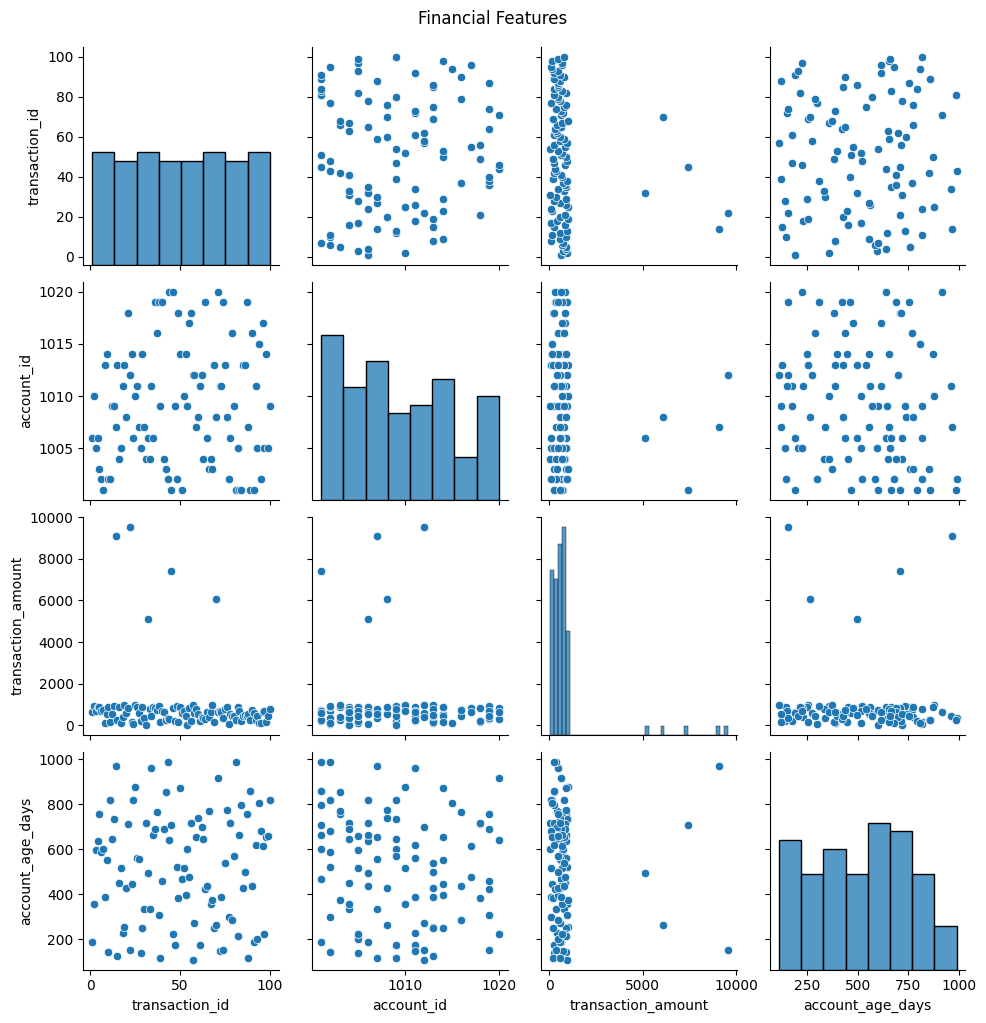

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.suptitle("Financial Features", y=1.02)
plt.show()

Apply Isolation Forest

In [4]:
from sklearn.ensemble import IsolationForest

# Select relevant features for anomaly detection
features = ['transaction_amount', 'account_age_days']

# Initialize Isolation Forest model
model = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

# Fit the model and predict anomalies
df['anomaly_score'] = model.fit_predict(df[features])

# Anomaly scores: -1 for outliers, 1 for inliers
df['is_anomaly'] = df['anomaly_score'].apply(lambda x: 'Yes' if x == -1 else 'No')

display(df.head())

,transaction_id,account_id,transaction_amount,category,transaction_date,account_age_days,anomaly_score,is_anomaly
0,1,1006,641.411341,rent,2023-01-01,188,1,No
1,2,1010,939.473090,groceries,2023-01-02,357,1,No
2,3,1005,705.268178,utilities,2023-01-03,598,1,No
3,4,1006,870.172350,rent,2023-01-04,639,1,No
4,5,1003,866.850316,entertainment,2023-01-05,758,1,No


Visualize Detected Anomalies

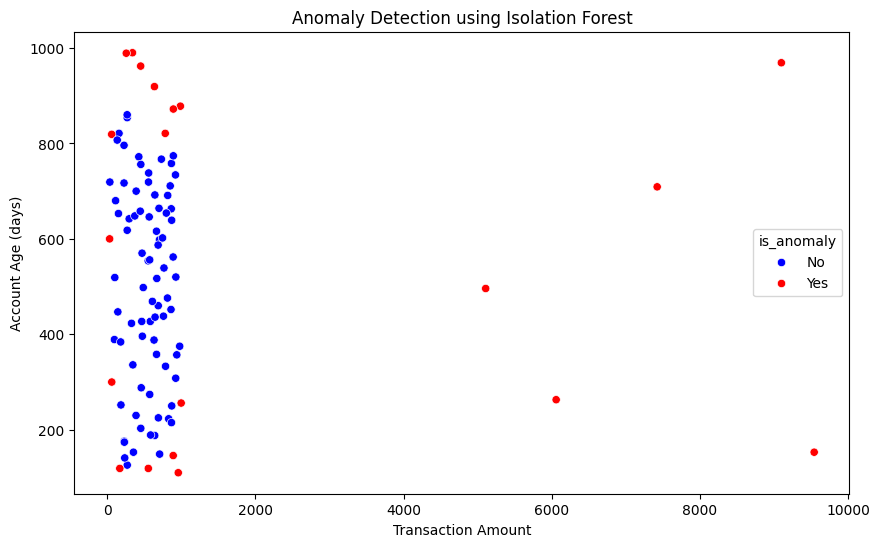

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='transaction_amount', y='account_age_days', hue='is_anomaly', data=df, palette={'Yes': 'red', 'No': 'blue'})
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Transaction Amount')
plt.ylabel('Account Age (days)')
plt.show()

Apply Local Outlier Factor (LOF)

In [6]:
from sklearn.neighbors import LocalOutlierFactor

# Select relevant features for anomaly detection
features = ['transaction_amount', 'account_age_days']

# Initialize Local Outlier Factor model
# n_neighbors: Number of neighbors to consider for the local density estimation
# contamination: The proportion of outliers in the data set. 'auto' is default.
lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')

# Fit the model and predict outliers
# The fit_predict method returns -1 for outliers and 1 for inliers
df['lof_anomaly_score'] = lof.fit_predict(df[features])

# Anomaly scores: -1 for outliers, 1 for inliers
df['is_lof_anomaly'] = df['lof_anomaly_score'].apply(lambda x: 'Yes' if x == -1 else 'No')

display(df.head())

,transaction_id,account_id,transaction_amount,category,transaction_date,account_age_days,anomaly_score,is_anomaly,lof_anomaly_score,is_lof_anomaly
0,1,1006,641.411341,rent,2023-01-01,188,1,No,1,No
1,2,1010,939.473090,groceries,2023-01-02,357,1,No,1,No
2,3,1005,705.268178,utilities,2023-01-03,598,1,No,1,No
3,4,1006,870.172350,rent,2023-01-04,639,1,No,1,No
4,5,1003,866.850316,entertainment,2023-01-05,758,1,No,1,No


Visualize Detected Anomalies with LOF

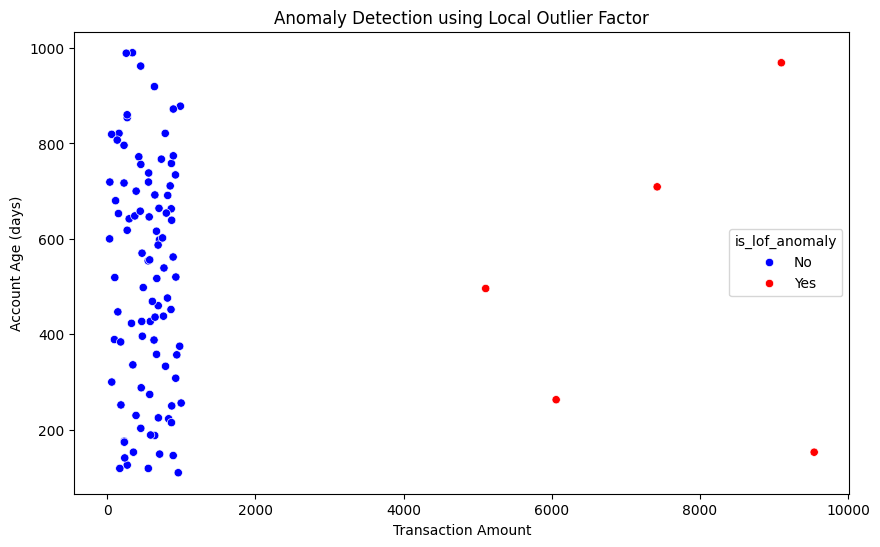

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='transaction_amount', y='account_age_days', hue='is_lof_anomaly', data=df, palette={'Yes': 'red', 'No': 'blue'})
plt.title('Anomaly Detection using Local Outlier Factor')
plt.xlabel('Transaction Amount')
plt.ylabel('Account Age (days)')
plt.show()

Compare Detected Anomalies

In [8]:
# Filter transactions identified as anomalies by either method
anomalies_comparison = df[(df['is_anomaly'] == 'Yes') | (df['is_lof_anomaly'] == 'Yes')]

display(anomalies_comparison[['transaction_id', 'transaction_amount', 'account_age_days', 'is_anomaly', 'is_lof_anomaly']])

,transaction_id,transaction_amount,account_age_days,is_anomaly,is_lof_anomaly
9,10,891.126768,146,Yes,No
13,14,9097.181039,969,Yes,Yes
18,19,998.439525,256,Yes,No
21,22,9540.107892,153,Yes,Yes
23,24,60.830303,819,Yes,No
24,25,988.080788,878,Yes,No
31,32,5107.545646,496,Yes,Yes
33,34,452.161149,962,Yes,No
38,39,170.490515,119,Yes,No
42,43,341.168549,990,Yes,No
